In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_main = pd.read_csv('/Users/ojasbardiya/Downloads/vgsales_data.csv')

In [3]:
df_main.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [4]:
df_main.shape

(55792, 23)

In [5]:
df_main.isnull().sum()

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64

In [6]:
df_main.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [7]:
#Only keep columns of interest
df_first = df_main.drop(df_main.columns[[4, 8, 9, 10, 18, 19, 20, 21, 22]], axis=1)

In [8]:
df_first.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'Platform', 'Publisher',
       'Developer', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year'],
      dtype='object')

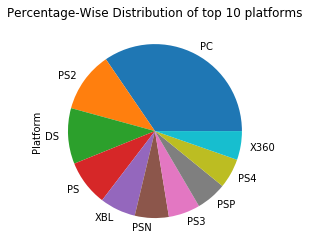

In [11]:
#Top 10 platforms
platforms = df_first['Platform'].value_counts(ascending=False)
top10_platforms = platforms.head(10)
top10_platforms.plot(kind="pie", title="Percentage-Wise Distribution of top 10 platforms")

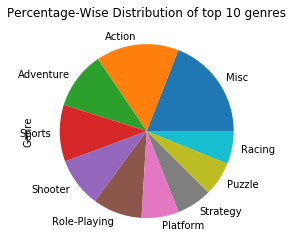

In [12]:
#Top 10 genres
genres = df_first['Genre'].value_counts(ascending=False)
top10_genres = genres.head(10)
top10_genres.plot(kind="pie", title="Percentage-Wise Distribution of top 10 genres")

In [ ]:
#Bestselling games
bestsellers = df_first[['Name','Total_Sales']]
bestsellers = bestsellers.groupby('Name',as_index=False).sum()
bestsellers = bestsellers.sort_values(by=['Total_Sales'],ascending=False

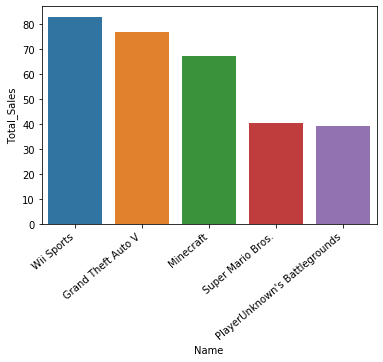

In [29]:
bestsellers = bestsellers.head(5)
ax = sns.barplot(x = "Name", y ="Total_Sales", data=bestsellers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [13]:
#Create a copy of main dataframe
df_second = df_first.loc[:,:]

In [28]:
#Determining total sales
for i in range(len(df_second)):
    if not pd.isna(df_second.loc[i,'Global_Sales']):
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'Global_Sales']
    elif not pd.isna(df_second.loc[i,'Total_Shipped']):
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'Total_Shipped']
    else:
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'NA_Sales'] + df_second.loc[i,'PAL_Sales'] + df_second.loc[i,'JP_Sales'] + df_second.loc[i,'Other_Sales']

In [15]:
#Filter out null values acc. to Year
df_second = df_first[df_first['Year'].notna()]
df_second = df_second.sort_values('Year', ascending=True)
df_second.isnull().sum()

Rank                 0
Name                 0
basename             0
Genre                0
Platform             0
Publisher            0
Developer           14
Total_Shipped    52986
Global_Sales     35436
NA_Sales         41855
PAL_Sales        41648
JP_Sales         47778
Other_Sales      39317
Year                 0
Total_Sales      33609
dtype: int64

## Distribution of genres for top 10 platforms as a stacked bar chart

In [31]:
df_platforms = df_first[df_first['Platform'].isin(top10_platforms.index)]
df_vis1 = df_platforms[['Platform', 'Genre']]

In [32]:
df_vis1.head(20)

,Platform,Genre
3,PC,Shooter
6,DS,Platform
9,PC,Misc
12,X360,Party
13,DS,Simulation
14,DS,Racing
19,PS3,Action
20,PS4,Action
21,DS,Misc
22,PC,Misc


In [33]:
Genre_counts = pd.crosstab(df_vis1['Platform'], df_vis1['Genre'])

In [127]:
Genre_counts

Genre,Action,Action-Adventure,Adventure,Board Game,Education,Fighting,MMO,Misc,Music,Party,Platform,Puzzle,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Visual Novel
Platform,,,,,,,,,,,,,,,,,,,,
DS,376,4,406,0,0,44,0,865,2,0,121,351,88,259,0,53,403,197,123,0
PC,1131,158,1605,1,9,124,37,1392,10,9,387,528,518,1049,5,1037,890,534,1502,52
PS,233,0,241,0,0,175,0,437,0,2,97,134,232,212,0,172,152,396,219,1
PS2,446,0,523,0,0,212,1,494,0,2,138,52,327,280,0,245,164,560,118,2
PS3,363,37,99,0,0,88,4,413,13,1,54,15,113,140,0,203,37,243,36,11
PS4,355,112,160,0,0,86,11,142,30,12,86,46,79,216,1,154,61,113,48,43
PSN,269,4,143,0,0,106,2,195,0,2,150,211,145,209,0,261,70,127,110,0
PSP,193,2,338,0,0,87,0,349,3,3,44,83,79,230,0,61,62,179,75,16
X360,303,31,84,0,0,82,0,288,22,3,42,14,126,109,0,250,49,254,35,9


## Genre Sales per year

In [40]:
df_vis2 = df_second[['Genre', 'Total_Sales', 'Year']]

In [49]:
df_vis2 = df_vis2.astype({'Year': int})

In [51]:
df_vis2.Genre.unique()

array(['Puzzle', 'Sports', 'Role-Playing', 'Action', 'Adventure',
       'Racing', 'Shooter', 'Strategy', 'Misc', 'Fighting', 'Platform',
       'Simulation', 'Action-Adventure', 'Music', 'Visual Novel',
       'Education', 'Sandbox', 'Party', 'MMO', 'Board Game'], dtype=object)

In [53]:
df_vis2.Genre = df_vis2.Genre.apply(lambda x: 'Other' if x not in top10_genres else x)

In [55]:
df_vis2.isnull().sum()

Genre              0
Total_Sales    33609
Year               0
dtype: int64

In [56]:
df_vis2 = df_vis2[df_vis2['Total_Sales'].notna()]

In [57]:
df_vis2.isnull().sum()

Genre          0
Total_Sales    0
Year           0
dtype: int64

In [60]:
df_vis2 = df_vis2.groupby(['Genre', 'Year'])['Total_Sales'].sum().reset_index()

In [62]:
df_vis2.head(10)

,Genre,Year,Total_Sales
0,Action,1970,0.21
1,Action,1977,1.25
2,Action,1978,1.18
3,Action,1979,0.31
4,Action,1981,1.88
5,Action,1982,14.45
6,Action,1983,7.15
7,Action,1984,2.63
8,Action,1985,3.95
9,Action,1986,2.86


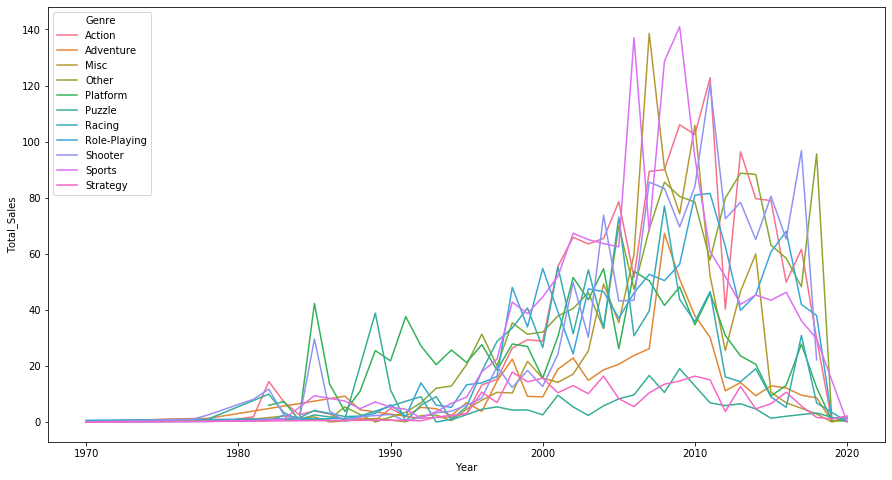

In [66]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=df_vis2)

## Sales distribution vs Genre and Region Heatmap

In [121]:
df_vis3 = df_second[['Genre','NA_Sales','PAL_Sales','JP_Sales','Other_Sales']]

In [122]:
df_vis3 = df_vis3.groupby('Genre').sum()

In [123]:
df_vis3

,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,624.87,367.02,90.64,123.20
Action-Adventure,67.84,62.51,5.60,19.45
Adventure,167.13,98.18,48.33,32.09
Board Game,0.06,0.22,0.02,0.02
Education,0.08,0.00,0.00,0.01
Fighting,184.48,85.28,63.44,30.70
MMO,4.88,3.42,2.36,1.19
Misc,311.61,154.60,68.90,60.78
Music,25.98,15.16,6.74,4.94


In [124]:
import plotly.express as px

In [125]:
fig = px.imshow(df_vis3.T)
fig.update_layout(title="Distribution of Sales by Genre and Region (In Millions)")
fig.show()

## Modelling total sales as a function of other parameters

In [129]:
df_first.shape

(54813, 15)

### df_first = main; df_second = Total_sales calculated, null values for year removed